# CS585 Problem Set 4 (Total points: 60 + 20 bonus)

Assignment adapted from Svetlana Lazebnik

### Instructions

1.  Assignment is due at **11.59 PM on Tuesday April 18 2023**.

2.  You can use Jupyter for this assignment. You do NOT have to use colab necessarily.

3.  Submission instructions:

    1.  A single `.pdf` report that contains your work for Q1, Q2, Q3, and
        Q4 (optional bonus), Q5, Q6 (optional bonus), Q7 and Q8 (optional bonus). For Q5 and Q6, you should type out your responses in **LaTeX**.   **Hand-written response is NOT allowed. If there's any scanned drawing, please [insert it](https://www.overleaf.com/learn/latex/Inserting_Images) in the latex file.** 
        If you are new to Latex, here's an [online tool](https://www.overleaf.com/) you can edit latex file. And a [quick guide](https://www.overleaf.com/learn/latex/Learn_LaTeX_in_30_minutes) to write a piece of Latex, and how to add math in it. If your other parts of the report is not written in Latex, you can merge them with a .pdf merging tool, such as [this](https://www.sodapdf.com/pdf-merge/).

        <!-- or any other word processing software. 
         You can also hand write them on a
        tablet, or scan in hand-written answers. If you hand-write, please make
        sure they are neat and legible. If you are scanning, make sure that the
        scans are legible. Lastly, convert your work into a `PDF`.  -->

        For Q1, Q2, Q3 and Q7, your response should also be electronic (**also no handwritten
        responses allowed**). Please refer to the **checklist** of at the end of this file to include the required result. **Points will not be given if the corresponding required item(s) in the checklist are missing in your report. (IMPORTANT!!!)** 
        You will not receive credit for 
        any results you have obtained, but failed to include directly in the PDF
        report file. 
        <!-- you want us to look at. -->
        
        PDF file should be submitted to
        [Gradescope](https://www.gradescope.com) under `PS4`. Please tag the reponses in your PDF with the Gradescope
        questions outline  as described in
        [Submitting an Assignment](https://youtu.be/u-pK4GzpId0). 

    2.  You also need to submit code for Q1, Q2, Q3 and Q7 in the form of a single
        `.py` file that includes all your code, all in the same
        directory. Code should be submitted to
        [Gradescope](https://www.gradescope.com) under `PS4-Code`. 
        ***Not submitting your code will lead to a loss of
        100% of the points on Q1, Q2, Q3 and Q7.***

    3.  ***We reserve the right to take off points for not following
        submission instructions.*** In particular, please tag the reponses
        in your PDF with the Gradescope questions outline as described
        in [Submitting an Assignment](https://youtu.be/u-pK4GzpId0). 

    




# Checklist for PS4 **Report**: (Please include them in your report to get the corresponding credits)
1.   Q1: **- (2 pts)**
  *   printed lab 1 camera projection (3 x 4 matrix) **- (0.5 pts)**
  *   printed lab 2 camera projection (3 x 4 matrix) **- (0.5 pts)**
  *   residual in lab 1 **- (0.5 pts)**
  *   residual in lab 2 **- (0.5 pts)**

2.   Q2: **- (2 pts)**
  *   printed lab1 camera center  **- (1 pts)**
  *   printed lab2 camera center  **- (1 pts)**
3.   Q3: **- (2 pts)**
  *   a 3D display of the two camera centers and the reconstructed points. **- (1 pts)**
  *   the residuals between the observed 2D points and the projected 3D poins in the two images. **- (1 pts)**

4. Q4 (BONUS): **- (2 pts)** 
  * number of inliers **- (1 pts)**
  * average residual for the inliers **- (1 pts)**

5. Q7 **- (8 pts)** 
  * 7.1 A ps5_example.jpg with plotted vanishing points and lines to estimate the VPs. **- (2 pts)** 
  * 7.2 The focal length and optical center (principal point) of the camera. **- (2 pts)** 
  * 7.3 The rotation matrix for the camera **- (2 pts)** 
  * 7.4 The estimated heights of the large building in the center of the image, the spike statue, and the lamp posts . **- (1 pts)** 
  * 7.4 A brief explanation of the calculation process, i.e. show all the lines and measurements used to perform the calculation. **- (1 pts)** 

### Problems

1. **Camera Calibration [8 pts]**. For the pair of images in the folder `calibraion`, calculate the camera projection matrices by using 2D matches in both views and 3D point
coordinates in `lab_3d.txt`. Once you have computed your projection matrices,
you can evaluate them using the provided evaluation function
(evaluate_points). The function outputs the projected 2-D points and
residual error. Report the estimated 3 × 4 camera projection matrices (for
each image), and residual error.
<b>Hint:</b> The residual error should be < 20 and the squared distance of the
projected 2D points from actual 2D points should be < 4.



In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def evaluate_points(M, points_2d, points_3d):
    """
    Visualize the actual 2D points and the projected 2D points calculated from
    the projection matrix
    You do not need to modify anything in this function, although you can if you
    want to
    :param M: projection matrix 3 x 4
    :param points_2d: 2D points N x 2
    :param points_3d: 3D points N x 3
    :return:
    """
    N = len(points_3d)
    points_3d = np.hstack((points_3d, np.ones((N, 1))))
    points_3d_proj = np.dot(M, points_3d.T).T
    u = points_3d_proj[:, 0] / points_3d_proj[:, 2]
    v = points_3d_proj[:, 1] / points_3d_proj[:, 2]
    residual = np.sum(np.hypot(u-points_2d[:, 0], v-points_2d[:, 1]))
    residual_1 = np.sum(np.square(np.hypot(u-points_2d[:, 0], v-points_2d[:, 1])))
    points_3d_proj = np.hstack((u[:, np.newaxis], v[:, np.newaxis]))
    return points_3d_proj, residual , residual_1
def camera_calibration(pts_2d, pts_3d):
    """
    Compute camera matrix using Direct Linear Transformation (DLT) algorithm
    :param pts_2d: 2D points N x 2
    :param pts_3d: 3D points N x 3
    :return: camera projection matrix 3 x 4
    """
    N = len(pts_2d)
    pts_3d_h = np.hstack((pts_3d, np.ones((N, 1))))
    A = np.zeros((2*N, 12))

    for i in range(N):
        u, v = pts_2d[i]
        X, Y, Z, _ = pts_3d_h[i]
        A[2*i] = np.array([X, Y, Z, 1, 0, 0, 0, 0, -u*X, -u*Y, -u*Z, -u])
        A[2*i+1] = np.array([0, 0, 0, 0, X, Y, Z, 1, -v*X, -v*Y, -v*Z, -v])

    _, _, V = np.linalg.svd(A)
    P = V[-1].reshape(3, 4)
    return P / P[2, 3]

"""# Write your code here for camera calibration
def camera_calibration(pts_2d, pts_3d):
    
    # Step 1: Normalize the 2D points
    mean = np.mean(pts_2d, axis=0)
    s = np.sqrt(2) / np.std(pts_2d - mean)
    T = np.array([[s, 0, -s*mean[0]],
                  [0, s, -s*mean[1]],
                  [0, 0, 1]])

    # Apply normalization to 2D points
    pts_2d_norm = np.hstack((pts_2d, np.ones((len(pts_2d), 1))))
    pts_2d_norm = np.dot(T, pts_2d_norm.T).T

    # Step 2: Construct the A matrix
    A = []
    for i in range(len(pts_2d)):
        X, Y, Z = pts_3d[i]
        u, v, _ = pts_2d_norm[i]
        row1 = [X, Y, Z, 1, 0, 0, 0, 0, -u*X, -u*Y, -u*Z, -u]
        row2 = [0, 0, 0, 0, X, Y, Z, 1, -v*X, -v*Y, -v*Z, -v]
        A.append(row1)
        A.append(row2)
    A = np.array(A)

    # Step 3: Solve the linear system of equations
    U, S, V = np.linalg.svd(A)
    P = V[-1].reshape((3, 4))

    # Step 4: Denormalize the projection matrix
    P = np.dot(np.linalg.inv(T), P)
    P = P / P[-1, -1]

    return P"""



# Load 3D points, and their corresponding locations in 
# the two images.
pts_3d = np.loadtxt('calibration/lab_3d.txt')
matches = np.loadtxt('calibration/lab_matches.txt')

# print lab camera projection matrices:
lab1_proj = camera_calibration(matches[:, :2], pts_3d)
lab2_proj = camera_calibration(matches[:, 2:], pts_3d)
print('lab 1 camera projection')
print(lab1_proj)

print('')
print('lab 2 camera projection')
print(lab2_proj)

# evaluate the residuals for both estimated cameras
_, lab1_res, _ = evaluate_points(lab1_proj, matches[:, :2], pts_3d)
print('residuals between the observed 2D points and the projected 3D points:')
print('residual in lab1:', lab1_res)
_, lab2_res, _ = evaluate_points(lab2_proj, matches[:, 2:], pts_3d)
print('residual in lab2:', lab2_res)



lab 1 camera projection
[[-2.33260962e+00 -1.10025080e-01  3.37513233e-01  7.36686567e+02]
 [-2.31044166e-01 -4.79515070e-01  2.08722206e+00  1.53627263e+02]
 [-1.26377057e-03 -2.06774255e-03  5.14712341e-04  1.00000000e+00]]

lab 2 camera projection
[[-2.04586455e+00  1.18558243e+00  3.91381081e-01  2.44002874e+02]
 [-4.56804042e-01 -3.02392053e-01  2.14706068e+00  1.66030240e+02]
 [-2.24595257e-03 -1.09488059e-03  5.61389950e-04  1.00000000e+00]]
residuals between the observed 2D points and the projected 3D points:
residual in lab1: 13.545832897393742
residual in lab2: 15.544953455821137


2. **Camera Centers [3 pts].** Calculate the camera centers using the
estimated or provided projection matrices. Report the 3D
locations of both cameras in your report. <b>Hint:</b> Recall that the
camera center is given by the null space of the camera matrix.



In [2]:
import scipy.linalg

# Write your code here for computing camera centers
def calc_camera_center(proj):
    """
    Get camera center in the world from the projection matrix
    """
    null_space = scipy.linalg.null_space(proj)
    camera_center = null_space[:, -1] / null_space[-1, -1]
    return camera_center


# compute the camera centers using the projection matrices
lab1_c = calc_camera_center(lab1_proj)
lab2_c = calc_camera_center(lab2_proj)

print('lab1 camera center', lab1_c.T)
print('lab2 camera center', lab2_c.T)
#lab1_c.T.shape()


lab1 camera center [305.83276769 304.20103826  30.13699243   1.        ]
lab2 camera center [303.10003925 307.18428016  30.42166874   1.        ]


3. **Triangulation [8 pts].** Use linear least squares to triangulate the
3D position of each matching pair of 2D points using the two camera
projection matrices. As a sanity check, your triangulated 3D points for the
lab pair should match very closely the originally provided 3D points in
`lab_3d.txt`. Display the two camera centers and
reconstructed points in 3D. Include snapshots of this visualization in your
report. Also report the residuals between the observed 2D points and the
projected 3D points in the two images. Note: You do not
need the camera centers to solve the triangulation problem. They are used
just for the visualization.



Mean 3D reconstruction error for the lab data:  0.01338
2D reprojection error for the lab 1 data:  6.39182788941501
2D reprojection error for the lab 2 data:  5.902480921355939


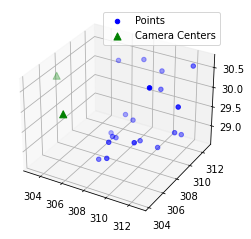

In [4]:
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D

def triangulation(lab_pt1, lab1_proj, lab_pt2, lab2_proj):
    """
    Triangulate the 3D position of each matching pair of 2D points 
    using the two camera projection matrices.
    """
    num_points = lab_pt1.shape[0]
    points_3d = np.zeros((num_points, 4))
    for i in range(num_points):
        A = np.vstack((lab_pt1[i, 0]*lab1_proj[2,:] - lab1_proj[0,:],
                       lab_pt1[i, 1]*lab1_proj[2,:] - lab1_proj[1,:],
                       lab_pt2[i, 0]*lab2_proj[2,:] - lab2_proj[0,:],
                       lab_pt2[i, 1]*lab2_proj[2,:] - lab2_proj[1,:]))
        U, S, V = np.linalg.svd(A)
        point_3d = V[-1,:]
        point_3d /= point_3d[3]
        points_3d[i,:] = point_3d
    return points_3d[:,:-1]

def evaluate_points_3d(points_3d_lab, points_3d_gt):
    """
    Evaluate the triangulated 3D points
    """
    res = np.linalg.norm(points_3d_lab - points_3d_gt, axis=1)
    return res

# triangulate the 3D point cloud for the lab data 
matches_lab = np.loadtxt('lab_matches.txt')
lab_pt1 = matches_lab[:,:2]
lab_pt2 = matches_lab[:,2:]
points_3d_gt = np.loadtxt('lab_3d.txt')
points_3d_lab = triangulation(lab_pt1, lab1_proj, lab_pt2, lab2_proj)
res_3d_lab = evaluate_points_3d(points_3d_lab, points_3d_gt) 
print('Mean 3D reconstruction error for the lab data: ', round(np.mean(res_3d_lab), 5))
_, res_2d_lab1, _ = evaluate_points(lab1_proj, lab_pt1, points_3d_lab)
_, res_2d_lab2, _ = evaluate_points(lab2_proj, lab_pt2, points_3d_lab)
print('2D reprojection error for the lab 1 data: ', np.mean(res_2d_lab1))
print('2D reprojection error for the lab 2 data: ', np.mean(res_2d_lab2))

# visualization of lab point cloud
camera_centers = np.vstack((lab1_c[:3], lab2_c[:3]))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_3d_lab[:, 0], points_3d_lab[:, 1], points_3d_lab[:, 2], c='b', label='Points')
ax.scatter(camera_centers[:, 0], camera_centers[:, 1], camera_centers[:, 2], c='g', s=50, marker='^', label='Camera Centers')
ax.legend(loc='best')
plt.show()


Mean 3D reconstuction error for the lab data:  0.0049
2D reprojection error for the lab 1 data:  6.39182788941501
2D reprojection error for the lab 2 data:  5.902480921355939
(2, 4)


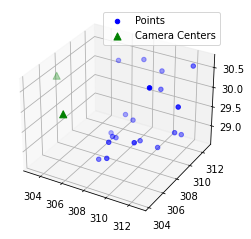

In [6]:
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D

def triangulation(lab_pt1, lab1_proj, lab_pt2, lab2_proj):
    """
    Triangulate the 3D position of each matching pair of 2D points 
    using the two camera projection matrices.
    """
    num_points = lab_pt1.shape[0]
    points_3d = np.zeros((num_points, 4))
    for i in range(num_points):
        A = np.vstack((lab_pt1[i, 0]*lab1_proj[2,:] - lab1_proj[0,:],
                       lab_pt1[i, 1]*lab1_proj[2,:] - lab1_proj[1,:],
                       lab_pt2[i, 0]*lab2_proj[2,:] - lab2_proj[0,:],
                       lab_pt2[i, 1]*lab2_proj[2,:] - lab2_proj[1,:]))
        U, S, V = np.linalg.svd(A)
        point_3d = V[-1,:]
        point_3d /= point_3d[3]
        points_3d[i,:] = point_3d
    return points_3d[:,:-1]

def evaluate_points_3d(points_3d_lab, points_3d_gt):
    """
    Evaluate the triangulated 3D points
    """
    res = np.sum(np.square(points_3d_lab - points_3d_gt))
    return res

# triangulate the 3D point cloud for the lab data 
matches_lab = np.loadtxt('lab_matches.txt')
lab_pt1 = matches_lab[:,:2]
lab_pt2 = matches_lab[:,2:]
points_3d_gt = np.loadtxt('lab_3d.txt')
points_3d_lab = triangulation(lab_pt1, lab1_proj, lab_pt2, lab2_proj)
res_3d_lab = evaluate_points_3d(points_3d_lab, points_3d_gt) 
print('Mean 3D reconstuction error for the lab data: ', round(np.mean(res_3d_lab), 5))
_, res_2d_lab1, _ = evaluate_points(lab1_proj, lab_pt1, points_3d_lab)
_, res_2d_lab2,_ = evaluate_points(lab2_proj, lab_pt2, points_3d_lab)
print('2D reprojection error for the lab 1 data: ', np.mean(res_2d_lab1))
print('2D reprojection error for the lab 2 data: ', np.mean(res_2d_lab2))

# visualization of lab point cloud
camera_centers = np.vstack((lab1_c[:4], lab2_c[:4]))
print(camera_centers.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_3d_lab[:, 0], points_3d_lab[:, 1], points_3d_lab[:, 2], c='b', label='Points')
ax.scatter(camera_centers[:, 0], camera_centers[:, 1], camera_centers[:, 2], c='g', s=50, marker='^', label='Camera Centers')
ax.legend(loc='best')
plt.show()


4. **Extra Credits [3 pts].** Use the putative match generation and RANSAC
code from `PS3` to estimate fundamental matrices without
ground-truth matches. For this part, only use the normalized algorithm.
Report the number of inliers and the average residual for the inliers.
Compare the quality of the result with the one you get from ground-truth
matches.



5. **Epipolar Geometry [15 pts total].** Let $M1$ and $M2$ be two camera matrices. We know that the fundamental matrix corresponding to these camera matrices is of the following form:
$$F = [a]×A,$$
where $[a]×$ is the matrix
$$[a]× = \begin{bmatrix}
0 & ay & −az
−ay & 0 & ax
az & −ax & 0\end{bmatrix}.$$
Assume that $M1 = [I|0]$ and $M2 = [A|a]$, where $A$ is a 3 × 3 (nonsingular) matrix. 

  1. **Combining with optical flow [5 pts]**. Propose an approach to modifies your optical flow implementation from Lab 8 to use epipolar geometry.

  2. **Epipoles [10 pts]** Prove that the last column of $M2$, denoted by $a$, is one of the epipoles and draw your result in a diagram similar to the following image:

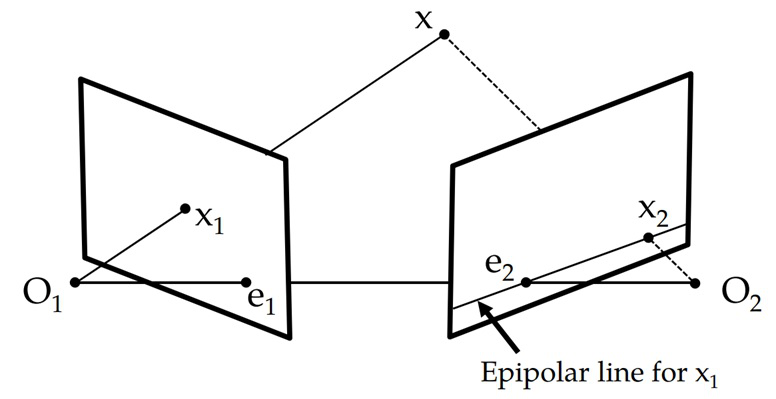

In [7]:
from PIL import Image
from IPython.display import display
display(Image.open('epipolar.jpg'))

6. **3D Estimation [Extra credit - 10 pts bonus].** Design a bundle adjuster that allows for arbitrary chains of transformations and prior knowledge about the unknowns, see [SZ Figures 11.14-11.15](http://szeliski.org/Book/) for an example.

7. **Vanishing points [12 pts total]** Using `ps5_example.jpg`, you need to estimate the three major orthogonal vanishing points. Use at least three manually selected lines to solve for each vanishing point. The starter code below provides an interface for selecting and drawing the lines, but the code for computing the vanishing point needs to be inserted. For details on estimating vanishing points, see Lab 10. 

In [1]:
%matplotlib tk
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

def get_input_lines(im, min_lines=3):
    """
    Allows user to input line segments; computes centers and directions.
    Inputs:
        im: np.ndarray of shape (height, width, 3)
        min_lines: minimum number of lines required
    Returns:
        n: number of lines from input
        lines: np.ndarray of shape (3, n)
            where each column denotes the parameters of the line equation
        centers: np.ndarray of shape (3, n)
            where each column denotes the homogeneous coordinates of the centers
    """
    n = 0
    lines = np.zeros((3, 0))
    centers = np.zeros((3, 0))

    plt.figure()
    plt.axis('off')
    plt.imshow(im)
    print(f'Set at least {min_lines} lines to compute vanishing point')
    print(f'The delete and backspace keys act like right clicking')
    print(f'The enter key acts like middle clicking')
    while True:
        print('Click the two endpoints, use the right button (delete and backspace keys) to undo, and use the middle button to stop input')
        clicked = plt.ginput(2, timeout=0, show_clicks=True)
        if not clicked or len(clicked) < 2:
            if n < min_lines:
                print(f'Need at least {min_lines} lines, you have {n} now')
                continue
            else:
                # Stop getting lines if number of lines is enough
                break

        # Unpack user inputs and save as homogeneous coordinates
        pt1 = np.array([clicked[0][0], clicked[0][1], 1])
        pt2 = np.array([clicked[1][0], clicked[1][1], 1])
        # Get line equation using cross product
        # Line equation: line[0] * x + line[1] * y + line[2] = 0
        line = np.cross(pt1, pt2)
        lines = np.append(lines, line.reshape((3, 1)), axis=1)
        # Get center coordinate of the line segment
        center = (pt1 + pt2) / 2
        centers = np.append(centers, center.reshape((3, 1)), axis=1)

        # Plot line segment
        plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], color='b')

        n += 1

    return n, lines, centers

def plot_lines_and_vp(ax, im, lines, vp):
    """
    Plots user-input lines and the calculated vanishing point.
    Inputs:
        im: np.ndarray of shape (height, width, 3)
        lines: np.ndarray of shape (3, n)
            where each column denotes the parameters of the line equation
        vp: np.ndarray of shape (3, )
    """
    bx1 = min(1, vp[0] / vp[2]) - 10
    bx2 = max(im.shape[1], vp[0] / vp[2]) + 10
    by1 = min(1, vp[1] / vp[2]) - 10
    by2 = max(im.shape[0], vp[1] / vp[2]) + 10
    
    ax.imshow(im)
    for i in range(lines.shape[1]):
        if lines[0, i] < lines[1, i]:
            pt1 = np.cross(np.array([1, 0, -bx1]), lines[:, i])
            pt2 = np.cross(np.array([1, 0, -bx2]), lines[:, i])
        else:
            pt1 = np.cross(np.array([0, 1, -by1]), lines[:, i])
            pt2 = np.cross(np.array([0, 1, -by2]), lines[:, i])
        pt1 = pt1 / pt1[2]
        pt2 = pt2 / pt2[2]
        ax.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'g')

    ax.plot(vp[0] / vp[2], vp[1] / vp[2], 'ro')
    ax.set_xlim([bx1, bx2])
    ax.set_ylim([by2, by1])

def get_top_and_bottom_coordinates(im, obj):
    """
    For a specific object, prompts user to record the top coordinate and the bottom coordinate in the image.
    Inputs:
        im: np.ndarray of shape (height, width, 3)
        obj: string, object name
    Returns:
        coord: np.ndarray of shape (3, 2)
            where coord[:, 0] is the homogeneous coordinate of the top of the object and coord[:, 1] is the homogeneous
            coordinate of the bottom
    """
    plt.figure()
    plt.imshow(im)

    print('Click on the top coordinate of %s' % obj)
    clicked = plt.ginput(1, timeout=0, show_clicks=True)
    x1, y1 = clicked[0]
    # Uncomment this line to enable a vertical line to help align the two coordinates
    #plt.plot([x1, x1], [0, im.shape[0]], 'b')
    print('Click on the bottom coordinate of %s' % obj)
    clicked = plt.ginput(1, timeout=0, show_clicks=True)
    x2, y2 = clicked[0]

    plt.plot([x1, x2], [y1, y2], 'b')

    return np.array([[x1, x2], [y1, y2], [1, 1]])

7.1. **Estimating Horizon [3 pts]** You should: a) plot the VPs and the lines used to estimate the vanishing points (VP) on the image plane using the provided code. b) Specify the VP pixel coordinates. c) Plot the ground horizon line and specify its parameters in the form $a * x + b * y + c = 0$. Normalize the parameters so that: $a^2 + b^2 = 1$.

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import itertools
from math import isclose

def get_vanishing_point(lines):
    """
    Solves for the vanishing point using the user-input lines.
    """
    # Get the cross product of each pair of lines
    cross_product1 = np.cross(lines[:, 0], lines[:, 1])
    cross_product2 = np.cross(lines[:, 1], lines[:, 2])
    cross_product3 = np.cross(lines[:, 0], lines[:, 2])

    # Stack the cross-products and compute the mean along the rows
    vpts = np.mean(np.vstack((cross_product1, cross_product2, cross_product3)), axis=0)
    
    # Normalize the vanishing point coordinates by dividing by the last element
    vpts /= vpts[-1]
    
    return vpts


def get_horizon_line(vpts):
    """
    Calculates the ground horizon line.
    """
    # Get the cross product of the two vanishing points
    horizon_line = np.cross(vpts[:, 0], vpts[:, 1])

    # Compute the norm of the first two elements of the horizon line
    norm_factor = np.linalg.norm(horizon_line[:2])

    # Normalize the horizon line by dividing by the norm factor
    normalized_line = horizon_line / norm_factor

    # Extract the parameters of the normalized horizon line
    a, b, c = normalized_line

    # Print the normalized horizon line
    print(f"Normalized horizon line: ({a})x + ({b})y + ({c}) = 0")

    return normalized_line
def plot_horizon_line(ax, im, vpt1, vpt2):
    """
    Plots the horizon line.
    """
    ax.imshow(im)
    ax.plot([vpt1[0], vpt2[0]], [vpt1[1], vpt2[1]], color='green')
    return

im = np.asarray(Image.open('ps5_example.jpg'))

# Get vanishing points for each of the directions
num_vpts = 3
vpts = np.zeros((num_vpts, 3))
for i in range(num_vpts):
    print('Getting vanishing point %d' % i)
    # Get at least three lines from user input
    n, lines, centers = get_input_lines(im)
    # Solve for vanishing point
    vpts[i, :] = get_vanishing_point(lines)
    # Plot the lines and the vanishing point
    ax = plt.subplot(1, num_vpts, i+1)
    plot_lines_and_vp(ax, im, lines, vpts[i, :])

# Get the ground horizon line
horizon_line = get_horizon_line(vpts.T)
# Plot the ground horizon line
fig, ax = plt.subplots()
plot_horizon_line(ax, im, vpts[0], vpts[1])



print(vpts)







Getting vanishing point 0
Set at least 3 lines to compute vanishing point
The delete and backspace keys act like right clicking
The enter key acts like middle clicking
Click the two endpoints, use the right button (delete and backspace keys) to undo, and use the middle button to stop input
Click the two endpoints, use the right button (delete and backspace keys) to undo, and use the middle button to stop input
Click the two endpoints, use the right button (delete and backspace keys) to undo, and use the middle button to stop input
Click the two endpoints, use the right button (delete and backspace keys) to undo, and use the middle button to stop input


/var/folders/ry/qqr3x9d55rb8tlz6m6vx0jmc0000gn/T/ipykernel_42550/361175108.py:65: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, num_vpts, i+1)


Getting vanishing point 1
Set at least 3 lines to compute vanishing point
The delete and backspace keys act like right clicking
The enter key acts like middle clicking
Click the two endpoints, use the right button (delete and backspace keys) to undo, and use the middle button to stop input
Click the two endpoints, use the right button (delete and backspace keys) to undo, and use the middle button to stop input
Click the two endpoints, use the right button (delete and backspace keys) to undo, and use the middle button to stop input
Click the two endpoints, use the right button (delete and backspace keys) to undo, and use the middle button to stop input
Getting vanishing point 2
Set at least 3 lines to compute vanishing point
The delete and backspace keys act like right clicking
The enter key acts like middle clicking
Click the two endpoints, use the right button (delete and backspace keys) to undo, and use the middle button to stop input
Click the two endpoints, use the right button (de

7.2. **Solving for camera parameters [3 pts]** Using the fact that the vanishing directions are orthogonal, solve for the focal length and optical center (principal point) of the camera. Show all your work and include the computed parameters in your report.

In [10]:
from sympy import symbols, Matrix

vpts = np.array([[-3.41340022e+01,  2.02607821e+02,  1.00000000e+00],
 [ 1.38960185e+03,  2.31996001e+02,  1.00000000e+00],
 [ 4.87439352e+02,  1.02835031e+03,  1.00000000e+00]])

def get_camera_parameters(vpts):
    """
    Computes the camera parameters. Hint: The SymPy package is suitable for this.
    """
    vpts /= vpts[-1, :]
    vp1 = vpts[:, 0]
    vp2 = vpts[:, 1]
    vp3 = vpts[:, 2]
    A = []
    for (p1, p2) in itertools.combinations([vp1, vp2, vp3], 2):
         A.append([p1[0]*p2[0]+p1[1]*p2[1], p1[0]*p2[2]+p1[2]*p2[0], p1[1]*p2[2]+p1[2]*p2[1], p1[2]*p2[2]])
    u, s, v = np.linalg.svd(A, full_matrices=True)
    w1, w2, w3, w4 = v[-1,:]
    # form the omega matrix
    w = np.array([[w1, 0., w2],
                [0., w1, w3],
                [w2, w3, w4]])
         #w = (KK^T)^-1
        # K can be obtained by Cholesky factorization
    K_transpose_inv = np.linalg.cholesky(w)
    K = np.linalg.inv(K_transpose_inv.T)
    K = K / K[-1, -1]

        
vpts = vpts.T
K = get_camera_parameters(vpts)

print(K)

None


7.3. **Camera rotation matrix [3 pts]** Compute the rotation matrix for the camera, setting the vertical vanishing point as the Y-direction, the right-most vanishing point as the X-direction, and the left-most vanishing point as the Z-direction.

In [ ]:
def get_rotation_matrix(vpts, K):
    """
    Computes the rotation matrix using the camera parameters.
    """
    R = np.zeros((3, 3))
    Kinv = np.linalg.inv(K)
    for i in range(3):
        ri = np.dot(Kinv, vpts[:, i])
        R[:, i] = ri / np.linalg.norm(ri)
    return R

# <YOUR IMPLEMENTATION> Solve for the rotation matrix
R = get_rotation_matrix(vpts, K)
print(R)


7.4. **Measurement estimation [3 pts]** Estimate the heights of (a) the large building in the center of the image, (b) the spike statue, and (c) the lamp posts assuming that the person nearest to the spike is 5ft 6in tall. In the report, show all the lines and measurements used to perform the calculation. How do the answers change if you assume the person is 6ft tall?

In [ ]:
def estimate_height(obj_to_est, reference_object, reference_height, vpts):
    """
    Estimates height for a specific object using the recorded coordinates. You might need to plot additional images here for
    your report.
    """
    # Compute the height in pixels of the reference object
    ref_top_px = reference_object[0][1]
    ref_bottom_px = reference_object[1][1]
    ref_height_px = ref_bottom_px - ref_top_px
    
    # Compute the height in world units of the reference object
    ref_height_wu = reference_height / 12 * 0.3048
    
    # Compute the vanishing line for the direction of the object
    vanishing_line = compute_vanishing_line(obj_to_est, vpts)
    
    # Compute the height in pixels of the object to estimate
    top_px = obj_to_est[0][1]
    bottom_px = obj_to_est[1][1]
    height_px = bottom_px - top_px
    
    # Compute the height in world units of the object to estimate
    height_wu = ref_height_wu * height_px / ref_height_px
    
    # Compute the distance to the object using the vanishing line
    distance = abs(vanishing_line[2] / vanishing_line[1])
    
    # Compute the estimated height of the object in meters
    height_m = height_wu * distance
    
    # Convert height to feet and inches
    height_ft = height_m / 0.3048
    height_inches = (height_ft - int(height_ft)) * 12
    
    return int(height_ft), int(height_inches)

objects = ('person', 'Building', 'the spike statue', 'the lamp posts')
coords = dict()
for obj in objects:
    coords[obj] = get_top_and_bottom_coordinates(im, obj)

# Estimate heights
for height in [66, 72]:
    print(f"Assuming person is {height/12:.1f} ft tall:")
    for obj in objects[1:]:
        ft = height // 12
        inches = height % 12
        print(f'Estimating height of {obj} at {ft} ft {inches} inches')
        pred_height_ft, pred_height_inches = estimate_height(coords[obj], coords['person'], height, vpts)
        print(f'Predicted height: {pred_height_ft} ft {pred_height_inches} inches')


In [ ]:
def estimate_height(obj_to_est, reference_object, reference_height, vpts):
    """
    Estimates height for a specific object using the recorded coordinates. You might need to plot additional images here for
    your report.
    """
    # <YOUR IMPLEMENTATION>
    pass

objects = ('person', 'Building', 'the spike statue', 'the lamp posts')
coords = dict()
for obj in objects:
    coords[obj] = get_top_and_bottom_coordinates(im, obj)

# <YOUR IMPLEMENTATION> Estimate heights
for height in [66, 72]:
  for obj in objects[1:]:
    ft = height // 12
    inches = height % 12
    print('Estimating height of %s at height %i ft %i inches' % (obj, ft, inches))
    pred_height = estimate_height(coords[obj], coords['person'], height, vpts)
    ft = pred_height // 12
    inches = pred_height % 12
    print('predicted height: %i ft %i inches' % (ft, inches))

8. **Warped view [5 bonus pts]** Compute and display rectified views of the ground plane and the large building in the center of the image.